In [1]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
matplotlib.rcParams['font.family'] = 'UnDotum' # 리눅스 돋움체 설정
matplotlib.rcParams['font.size'] = 15 # 폰트 크기
matplotlib.rcParams['axes.unicode_minus'] = False  # - 마이너스 글꼴 오류 처리

In [3]:
import pandas as pd

data = {
    '영화' : ['명량', '극한직업', '신과함께-죄와 벌', '국제시장', '괴물', '도둑들', '7번방의 선물', '암살'],
    '개봉 연도' : [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
    '관객 수' : [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270], # (단위 : 만 명)
    '평점' : [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10]
}
df = pd.DataFrame(data)
df

/home/pi/.local/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


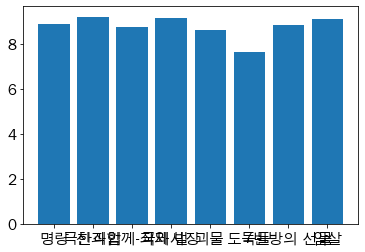

In [14]:
# 1. x축 영화, y축 평정 막대그래프 그리기
plt.bar(df['영화'], df['평점'])
plt.show()

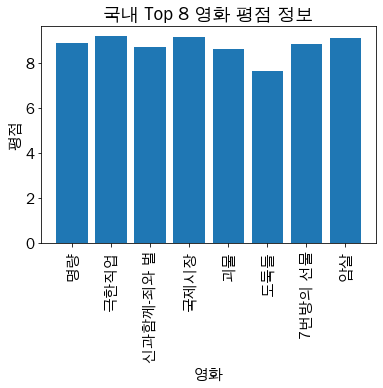

In [15]:
# 2. 앞에서 만든 그래프의 세부정보 적용하기
plt.bar(df['영화'], df['평점'])
plt.xlabel('영화')
plt.ylabel('평점')
plt.xticks(rotation=90)
# plt.ylim(6, 10)
plt.title('국내 Top 8 영화 평점 정보')
plt.show()

In [18]:
# 3. 개봉연도별 평점변화 추이 꺽은선 그래프로 나타내기
df_group=df.groupby('개봉 연도').mean()
df_group

,관객 수,평점
개봉 연도,,
2006,1301.0,8.62
2012,1298.0,7.64
2013,1281.0,8.83
2014,1593.5,9.02
2015,1270.0,9.10
2017,1441.0,8.73
2019,1626.0,9.20


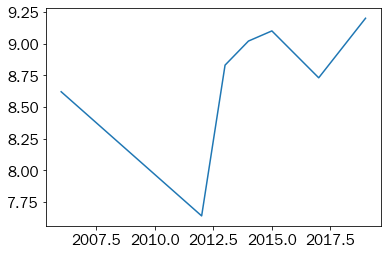

In [27]:
plt.plot(df_group.index, df_group['평점'])

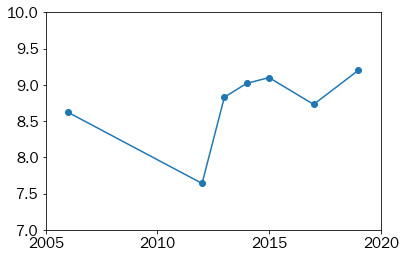

In [37]:
# 4. 앞에서 만든 그래프에서 제시된 세부사항 적용
# marker = '0
plt.plot(df_group.index, df_group['평점'], marker='o')
# x축 눈금 5년 단위
year = [2005, 2010, 2015, 2020]
plt.xticks(year)
# y축의 범위 최소 7, 최대 10
plt.ylim(7, 10)
plt.show()

In [60]:
type(df_group['평점'][df_group['평점'] < 9].count())

numpy.int64

### 진일의 풀이

In [94]:
# 평점 9점 이상과 미만의 갯수 세기
over_9 = df['평점'][df['평점'] >=9].count()

# 평점 9점 이상과 미만의 갯수 세기
under_9 = df['평점'][df['평점'] < 9].count()

# 데이터 만들기
data = {
    '구분' : ['9점 이상', '9점 미만'],
    'count' : [over_9, under_9]
}

df_pie = pd.DataFrame(data)
labels = list(df_pie['구분']) # 원그래프 레이블
values = list(df_pie['count']) # 원그래프 데이터

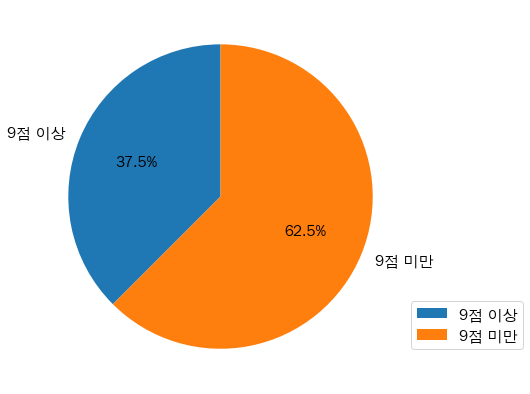

In [95]:
# 5. 평점이 9점 이상인 영화의 비율 확인하는 원그래프 나타내기
# label은 9점 이상, 9점 미만
# 퍼센트 소수 첫째 자리까지 표시
# 범례 그래프 우측에 표시
plt.figure(figsize=(7,7))
plt.pie(values, labels=labels, autopct='%.1f%%', startangle=90)
plt.legend(loc=(1, 0.1))
plt.show()

### 나도코딩 풀이

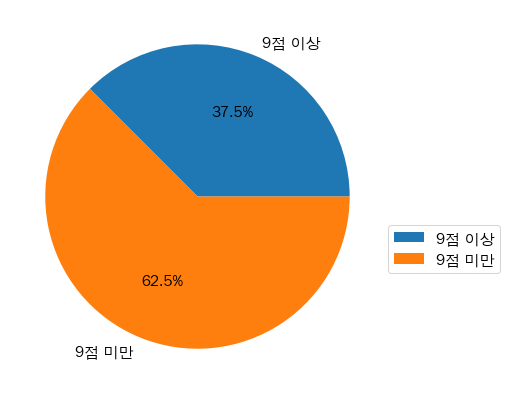

In [104]:
flt = df['평점'] >= 9
df.loc[flt] # 9점 이상의 값
df.loc[flt] # 9점 미만의 값

values = [len(df.loc[flt]), len(df.loc[~flt])]
labels = ['9점 이상', '9점 미만']

plt.figure(figsize=(7,7))
plt.pie(values, labels=labels, autopct='%.1f%%')
plt.legend(loc=(1, 0.3))
plt.show()